# SSLTelecom

## Problema

Te escribimos de la peluquería SSL, esta pandemia – entre otras cosas –, ha afectado a nuestro negocio, que a veces parece que está a punto de cerrar, para nuestro disgusto. Como no queremos rendirnos tan fácilmente, hemos pensado en abrir un nuevo negocio de **venta de teléfonos móviles** para ver si sacamos suficientes beneficios para mantener la pelu a flote.

Supongo que a estas alturas, te estarás preguntando: ¿y yo qué pinto en el negocio? Pues la verdad, es que no sabemos muy bien qué precio ponerle a nuestros teléfonos móviles y no queremos quedar atrás de nuestros competidores. Es por eso que necesitamos la ayuda de un **orfebre Data Scientist** que nos ayude a estimar correctamente el rango de precio de un teléfono móvil (bajo/medio/alto) para nosotras podernos hacer una idea del precio final al que podemos venderlo y no perder dinero.

Hemos adjuntado el fichero con los datos que tenemos disponibles actualmente. Si necesitas un diccionario con información relativa a los datos, háznoslo saber.

## Datos

- **Battery power**: indica la batería del móvil expresada en mAh
- **Blue**: indica si el móvil tiene bluetooth (1) o no (0)
- **Clock speed**: indica la rapidez de procesamiento
- **Dual sim**: indica si el móvil soporta dos SIM (1) o no (0)
- **Fc**: megapíxeles de la cámara frontal
- **Four_g**: indica si el móvil tiene 4G (1) o no (0)
- **Int_memory**: memoria interna expresada en Gb
- **M_dep**: grosor del teléfono móvil
- **Mobile_wt**: peso del teléfono móvil
- **N_cores**: número de cores del procesador
- **Pc**: megapíxeles de la cámara principal
- **Px_height**: resolución de píxeles (altura)
- **Px_width**: resolución de píxeles (ancho)
- **Ram**: RAM del móvil expresada en MegaBytes
- **Sc_h**: altura de la pantalla del móvil expresada en cm
- **Sc_w**: ancho de la pantalla del móvil expresada en cm
- **Talk time**: duración de la batería durante una conversación
- **Three_g**: indica si el móvil tiene 3G (1) o no (0)
- **Touch_screen**: indica si la pantalla del móvil es táctil (1) o no (0)
- **WiFi**: indica si el móvil tiene WiFi (1) o no (0)
- **Price-range**: indica si el móvil es de costo bajo (0), medio (1), alto (2) o muy alto (3)

## Lectura de datos

In [1]:
import pandas as pd

DATA_FILEPATH = '../data/mobile_phone_info.csv'
df = pd.read_csv(DATA_FILEPATH)
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


## Exploración de los datos

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

Lo primero que podemos ver es que todas las columnas del dataset son numéricas. Además, podemos ver que no hay valores nulos y que contamos con un dataset de 2000 finals y 21 columnas

In [3]:
df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


## Visualizando los datos

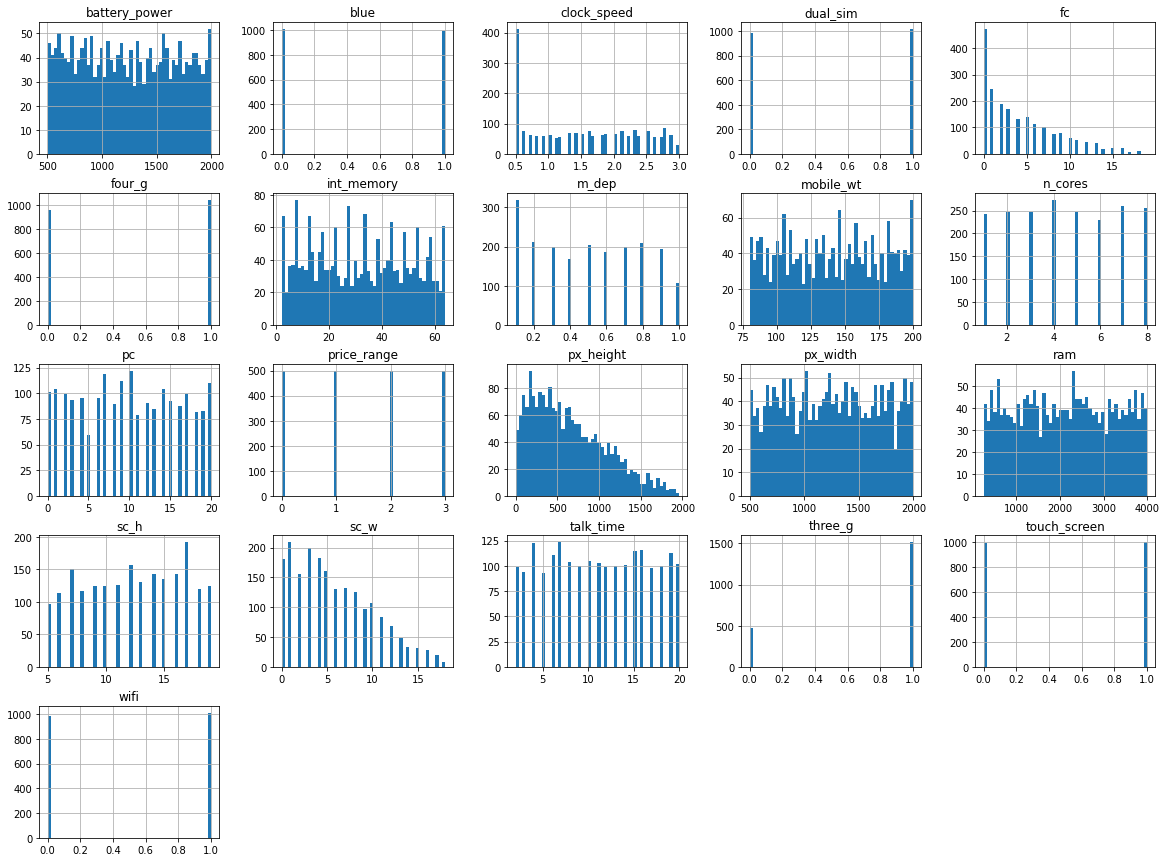

In [4]:
import matplotlib.pyplot as plt
df.hist(bins=50, figsize=(20,15))
plt.show()

### ¿Qué cosas vemos en este histograma?

- Nuestra columna a predecir `price_range` no está desbalanceada.
- Los atributos tiene escalas bastante diferentes. Por ejemplo `clock_speed` (0.5-3) vs `ram`(250-4000).
- Tal y como sabíamos por la descripción de los datos, tenemos varias variables categóricas: `blue`, `dual_sim`, `four_g`, `three_g`, `touch_screen`, `wifi` y nuestro target `price_range`.

Vamos a comprobar algunas de estas cosas. 

En primer lugar, vemos que tenemos un número de muestras igual para las 4 categorías de precio.

In [5]:
df['price_range'].value_counts()

3    500
2    500
1    500
0    500
Name: price_range, dtype: int64

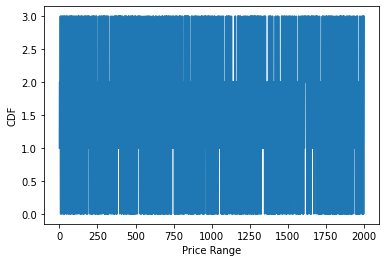

In [6]:
from empiricaldist import Cdf

df_cdf = Cdf(df['price_range'])
df_cdf.plot()
plt.xlabel('Price Range')
plt.ylabel('CDF')
plt.show()

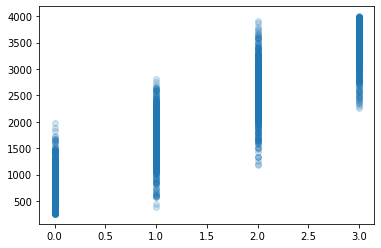

In [7]:
plt.plot(df['price_range'],  df['ram'], 'o', alpha=0.2)

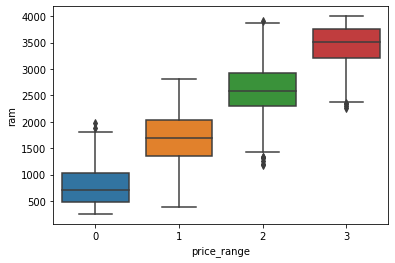

In [15]:
import seaborn as sns

sns.boxplot(data=df, x='price_range', y='ram')
plt.show()

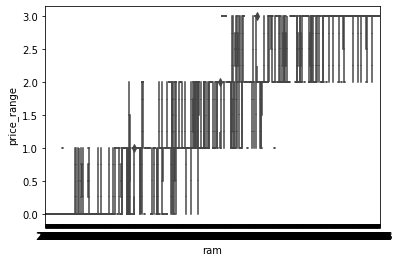